In [7]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import dm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (plot_corner, plot_chain, plot_fit, style, calculate_probs, get_params)

# 2 comp

In [8]:
style()

In [9]:
zfiles = glob(join(root_dir, 'Data', 'Effective-Volume', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(-0.10)_(0.10).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.10)_(0.16).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.16)_(0.20).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.20)_(0.23).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.23)_(0.26).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.26)_(0.28).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.28)_(0.30).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.30)_(0.32).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.32)_(0.34).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.34)_(0.36).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.36)_(0.37).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.37)_(0.39).hdf5',
  '/home2/s20321005/Thesis-Project/Data

In [10]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [11]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [0]
R = [3.4E-3]
zsun = [5]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.4)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.1)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [12]:
locs = dict(
    rhoDM=-0.05,
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    rhoDM=0.15,
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 5.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, -0.916290731874155, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -2.3025850929940455, 0.6931471805599454)]

In [13]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(33, 68)

In [14]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [15]:
for p in p0:
    print(dm.log_prob(p, zdata, wdata, locs, scales))

(44.918460449838136, 6.246954993260417)
(50.086147980293525, -1084.3776281784806)
(39.47097200209314, -1449.230973808573)
(45.121433598739976, -152.6368538929715)
(48.95746376449696, -2807.1508258629974)
(37.110950996376666, -212.6892940987423)
(46.29674237916861, -8136.228453172344)
(46.12510489450074, -308.46565417710144)
(41.689775668219646, -145.732813000387)
(42.579934406265686, -3422.3325693986567)
(41.772413758699756, -34181.85283461192)
(40.83158832516284, -10339.672548744284)
(40.500929066559515, -2047.1198591002506)
(40.7524798872415, -12.842470601512382)
(45.10531720001417, -5916.069565410976)
(48.50507307406195, -328.4734943872486)
(47.664585506244975, -14270.511312265751)
(45.4876175093794, -357.0355726876587)
(46.59871228922497, -1995.0177391512561)
(45.69051365427952, -1344.8637909586876)
(46.32154656712063, -18586.62720910282)
(42.09273968250857, -2997.3237651497175)
(45.3190436311805, -1083.0662574809774)
(41.11575199929337, -10144.734240448899)
(46.84848176114581, -45

In [16]:
p0_flat = p0.reshape(-1, ndim)
dm.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.49184604e+01, -3.86715055e+01,  6.24695499e+00],
       [ 5.00861480e+01, -1.13446378e+03, -1.08437763e+03],
       [ 3.94709720e+01, -1.48870195e+03, -1.44923097e+03],
       [ 4.51214336e+01, -1.97758287e+02, -1.52636854e+02],
       [ 4.89574638e+01, -2.85610829e+03, -2.80715083e+03],
       [ 3.71109510e+01, -2.49800245e+02, -2.12689294e+02],
       [ 4.62967424e+01, -8.18252520e+03, -8.13622845e+03],
       [ 4.61251049e+01, -3.54590759e+02, -3.08465654e+02],
       [ 4.16897757e+01, -1.87422589e+02, -1.45732813e+02],
       [ 4.25799344e+01, -3.46491250e+03, -3.42233257e+03],
       [ 4.17724138e+01, -3.42236252e+04, -3.41818528e+04],
       [ 4.08315883e+01, -1.03805041e+04, -1.03396725e+04],
       [ 4.05009291e+01, -2.08762079e+03, -2.04711986e+03],
       [ 4.07524799e+01, -5.35949505e+01, -1.28424706e+01],
       [ 4.51053172e+01, -5.96117488e+03, -5.91606957e+03],
       [ 4.85050731e+01, -3.76978567e+02, -3.28473494e+02],
       [ 4.76645855e+01, -1.43181759e+04

(33,)


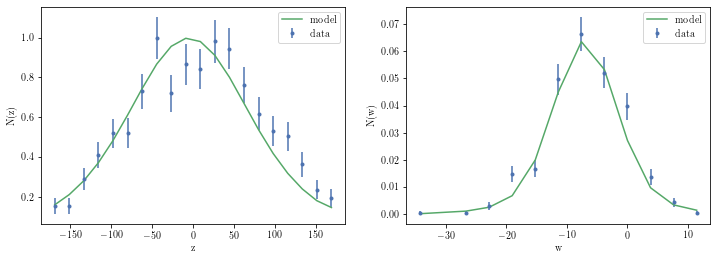

(56.52846920411638, 124.7997417884366)

In [17]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(theta, zdata, wdata, locs, scales)

In [18]:
t0 = time()
chain = dm.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

7.256169319152832 s


(500, 68, 33)

In [19]:
calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   46.5804849 ,   -12.13783264,    34.44265226],
       [   53.24292644,  -419.08809414,  -365.8451677 ],
       [   39.470972  , -1488.70194581, -1449.23097381],
       ...,
       [   43.72270941,    73.35500246,   117.07771187],
       [   47.37749714,    66.92225406,   114.29975121],
       [   48.06398201,    77.40084881,   125.46483081]])

100%|██████████| 10/10 [00:00<00:00, 19.38it/s]


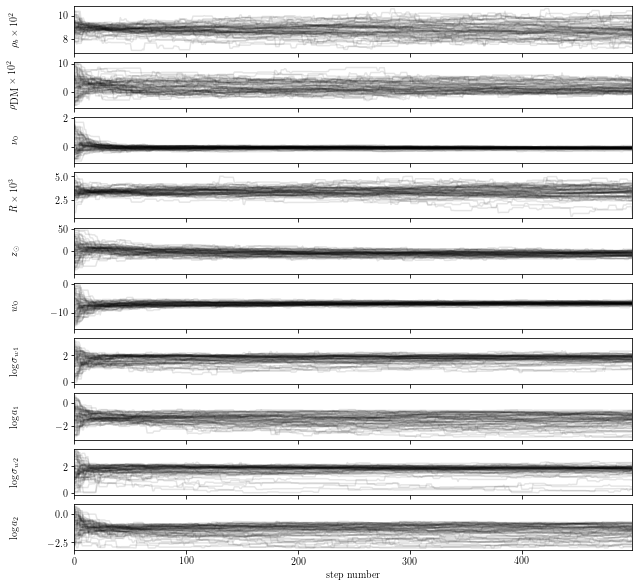

In [20]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [21]:
p0_next = chain[-1, :, :]
t0 = time()
chain = dm.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

28.0054030418396 s


(2000, 68, 33)

100%|██████████| 10/10 [00:00<00:00, 16.67it/s]


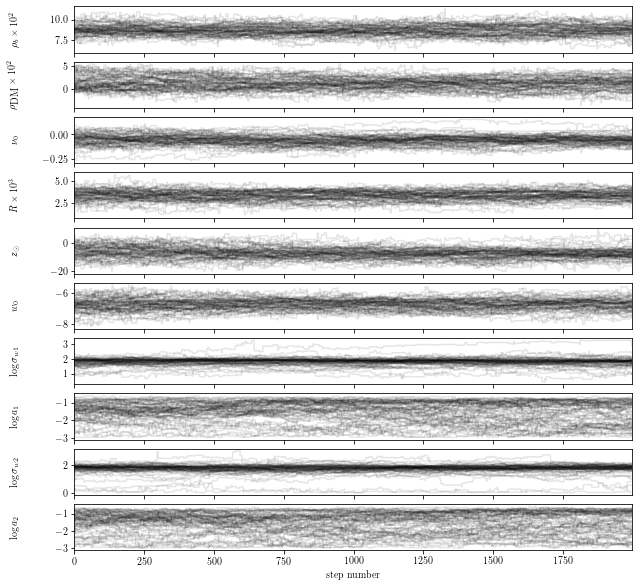

In [22]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

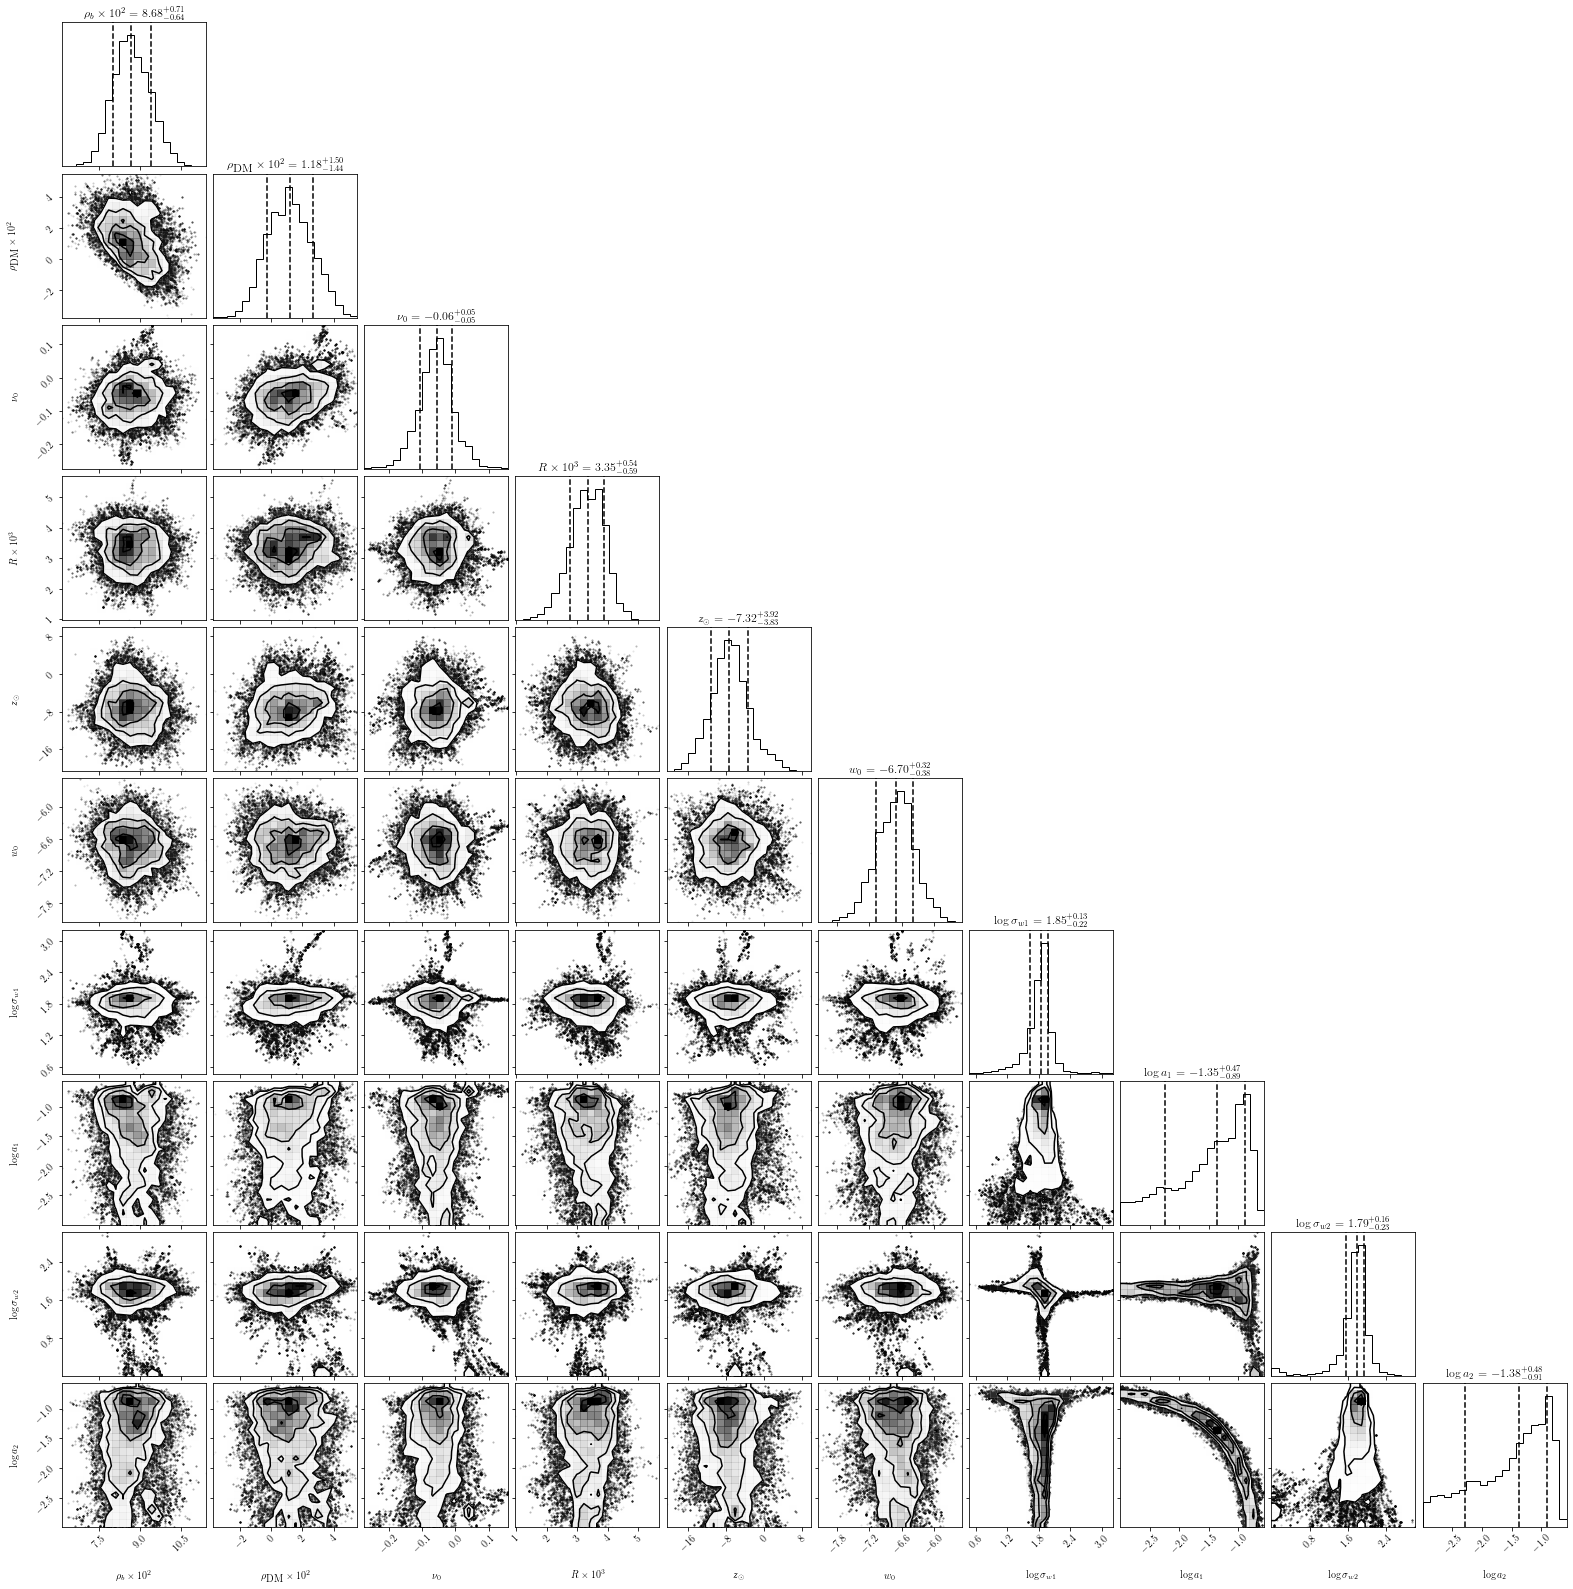

In [23]:
plot_corner(params, labels)

(136000, 33)


100%|██████████| 50000/50000 [00:42<00:00, 1175.58it/s]


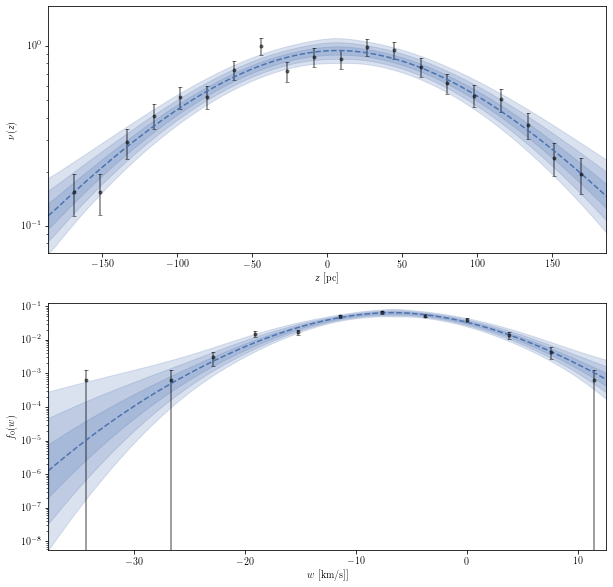

In [24]:
plot_fit(dm, zdata, wdata, chain, ndim)

In [25]:
probs = calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales)

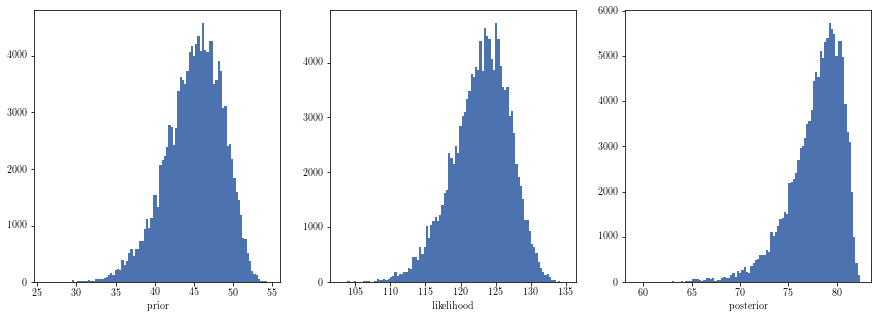

134.83256058584072

In [26]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

# educated initial guess!?!

check 1_mock_dm

# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# Mock comparison

run mcmc but now for mock data comparison.

`Data/MCMC/dm_mock/mock/comp`

It contains mock data with different number of data points.
1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000

This comparison is done to see the prediction power of the model.

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
from scipy.stats import norm
import sys
from glob import glob
import vaex
from hammer import dm
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)

In [28]:
from utils import style, calculate_probs, plot_chain, plot_corner, plot_fit

style()

In [29]:
zfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp','w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_50000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_500000.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/co

In [30]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [31]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
rhoDM = [0.016]
log_nu0 = [0]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.5)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.1)]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(33,)

In [32]:
locs = dict(
    rhoDM=-0.05,
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    rhoDM=0.15,
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('rhoDM', -0.05, 0.016, 0.09999999999999999),
 ('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 30.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, -0.6931471805599453, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -2.3025850929940455, 0.6931471805599454)]

(33,)


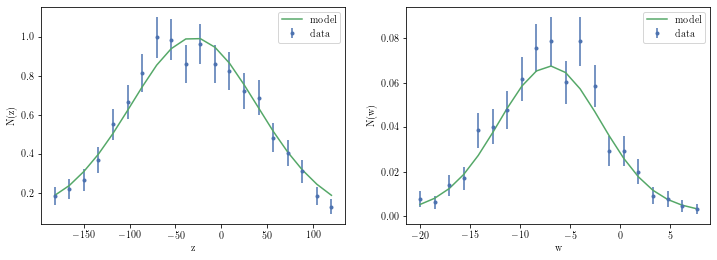

(56.52846920411638, 162.04860967016185)

In [33]:
print(theta.shape)
zmod = dm.fz(zmid, theta)
wmod = dm.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
dm.log_prob(theta, zdata, wdata, locs, scales)

In [34]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(33, 68)

In [35]:
p0 = dm.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(68, 33)

In [36]:
p0_flat = p0.reshape(-1, ndim)
dm.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 3.85777113e+01, -9.99200048e+02, -9.60622337e+02],
       [ 4.71790935e+01, -4.25802142e+02, -3.78623048e+02],
       [ 4.86871084e+01, -3.67957592e+02, -3.19270484e+02],
       [ 4.64065718e+01, -5.17462536e+04, -5.16998470e+04],
       [ 4.35845908e+01, -4.77189369e+02, -4.33604778e+02],
       [ 4.42874138e+01, -3.25261486e+02, -2.80974072e+02],
       [ 5.10946123e+01, -1.29668211e+02, -7.85735983e+01],
       [ 4.84350609e+01, -1.82147654e+03, -1.77304148e+03],
       [ 4.34506278e+01, -3.93038472e+02, -3.49587844e+02],
       [ 4.32872968e+01, -9.29527383e+02, -8.86240086e+02],
       [ 3.97419498e+01, -1.42495815e+02, -1.02753865e+02],
       [ 4.65675439e+01, -2.49757761e+03, -2.45101006e+03],
       [ 4.50779725e+01, -1.32219888e+02, -8.71419160e+01],
       [ 4.40623639e+01, -1.00736352e+03, -9.63301154e+02],
       [ 4.62419580e+01, -4.07370691e+02, -3.61128733e+02],
       [ 3.63396573e+01, -3.82607473e+02, -3.46267815e+02],
       [ 4.56155227e+01, -1.44207294e+03

In [37]:
t0 = time()
chain = dm.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

8.078170776367188 s


(500, 68, 33)

In [38]:
calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[  41.92873556, -553.22507165, -511.29633609],
       [  52.17287305,   63.31227546,  115.4851485 ],
       [  48.68710843, -367.95759194, -319.27048351],
       ...,
       [  44.89400979,  100.67245273,  145.56646252],
       [  46.55152314,  102.09325385,  148.64477699],
       [  51.34999346,  102.08574701,  153.43574046]])

100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


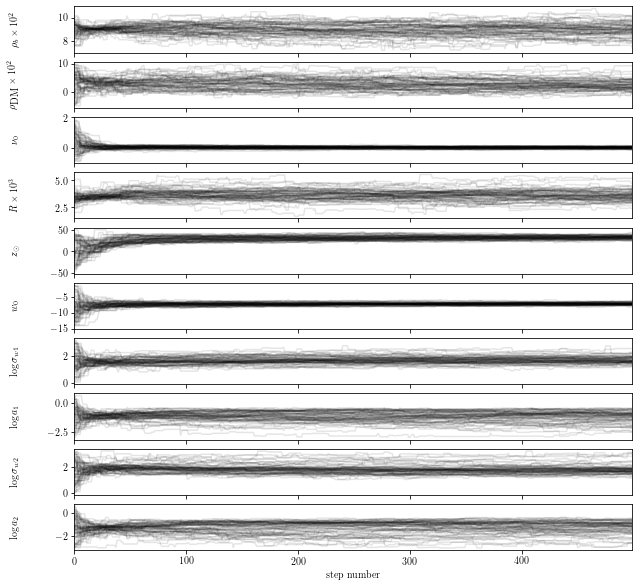

In [39]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [40]:
p0_next = chain[-1, :, :]
t0 = time()
chain = dm.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

31.239391565322876 s


(2000, 68, 33)

100%|██████████| 10/10 [00:00<00:00, 23.36it/s]


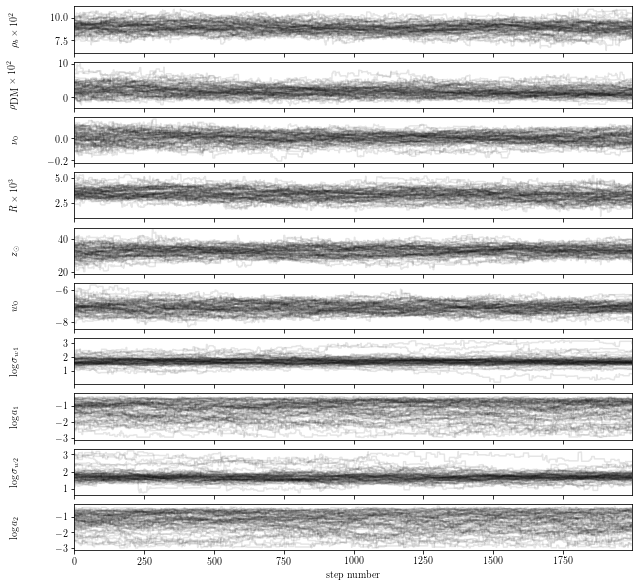

In [41]:
labels = [r'$\rho_b\times 10^2$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'rhoDM', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31, 32]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

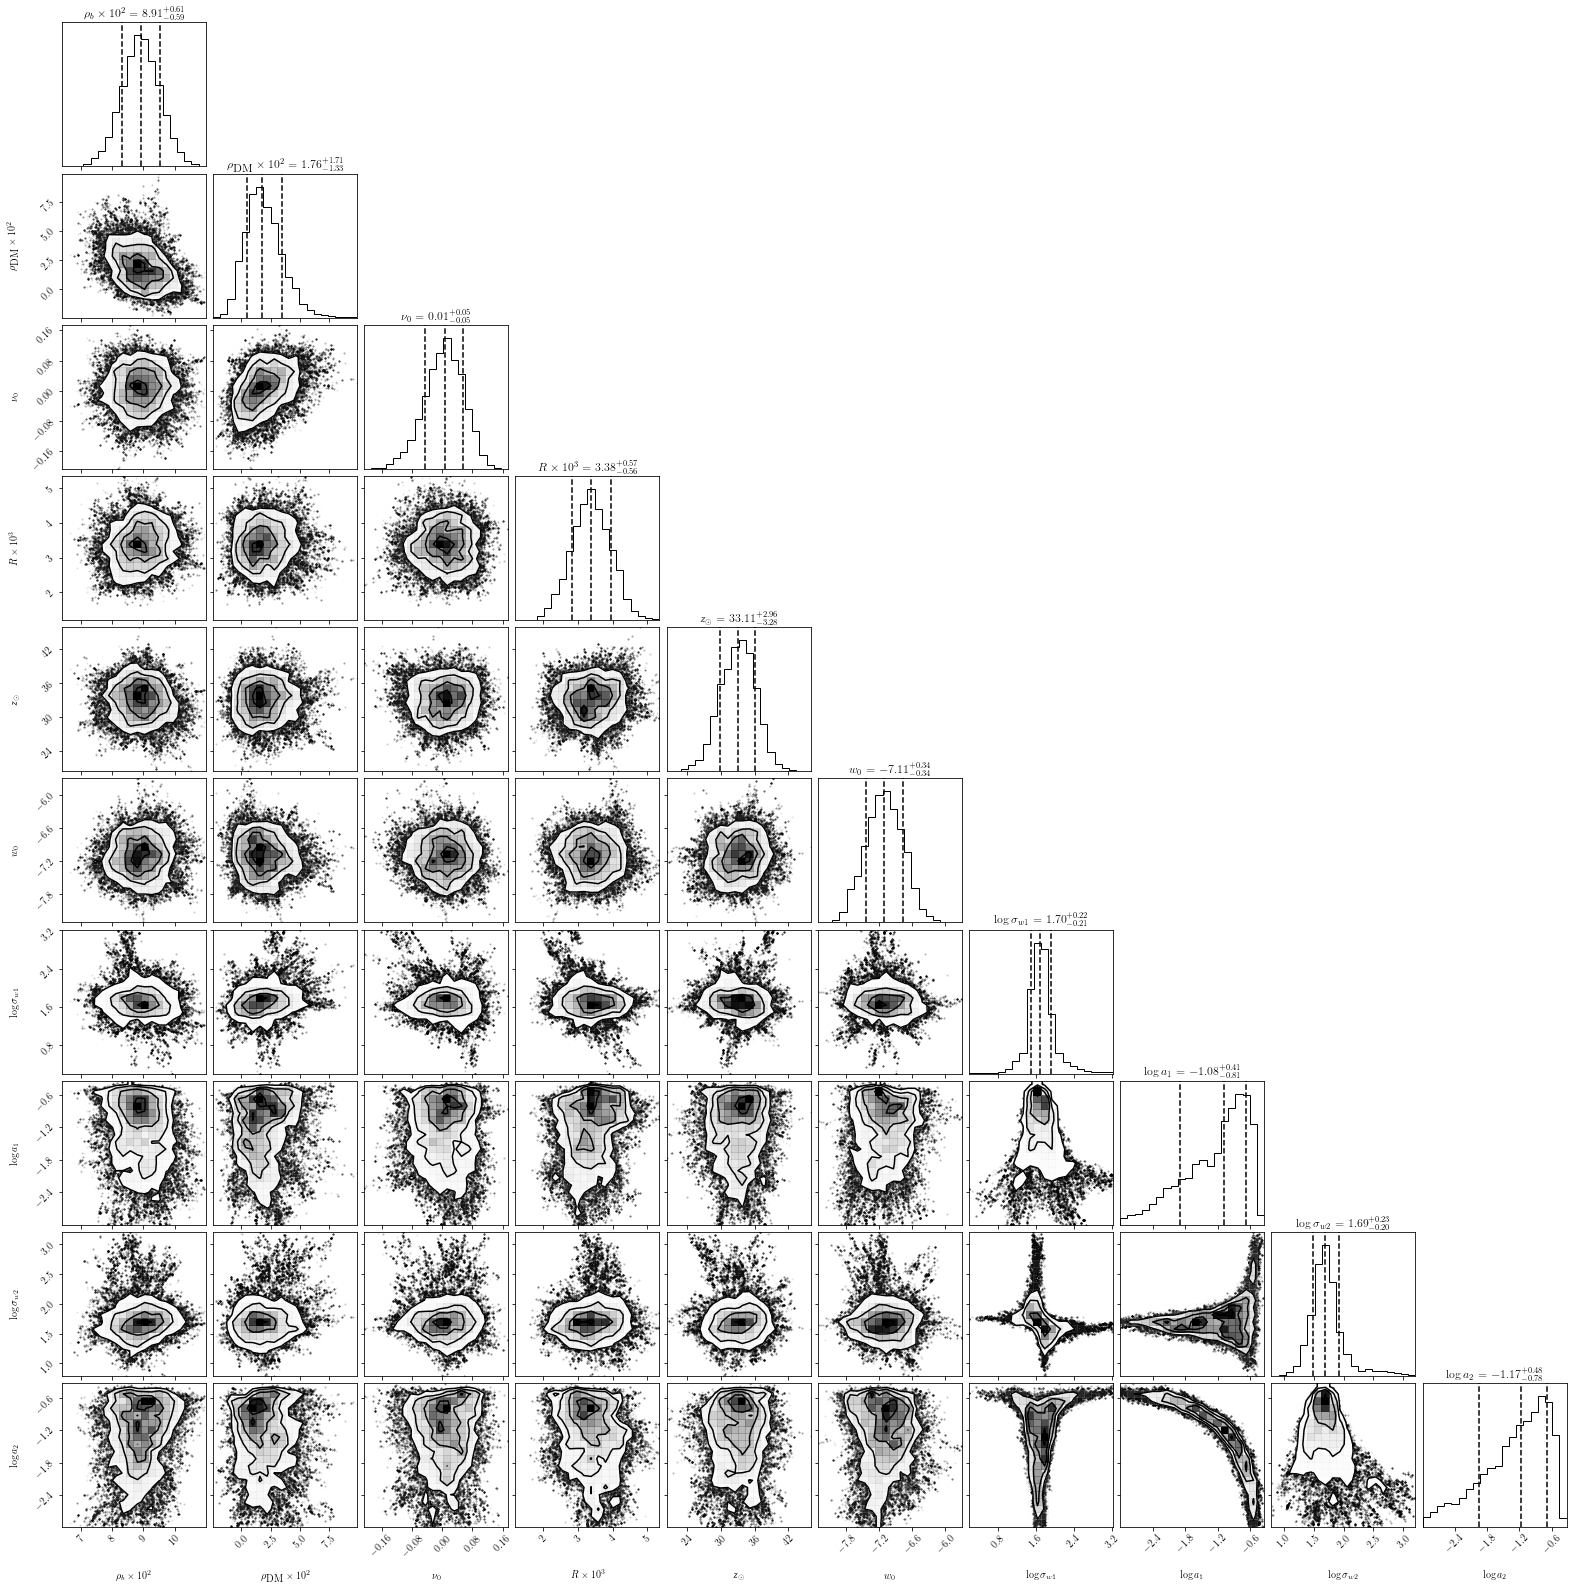

In [42]:
plot_corner(params, labels)

(136000, 33)


100%|██████████| 50000/50000 [01:02<00:00, 793.71it/s] 


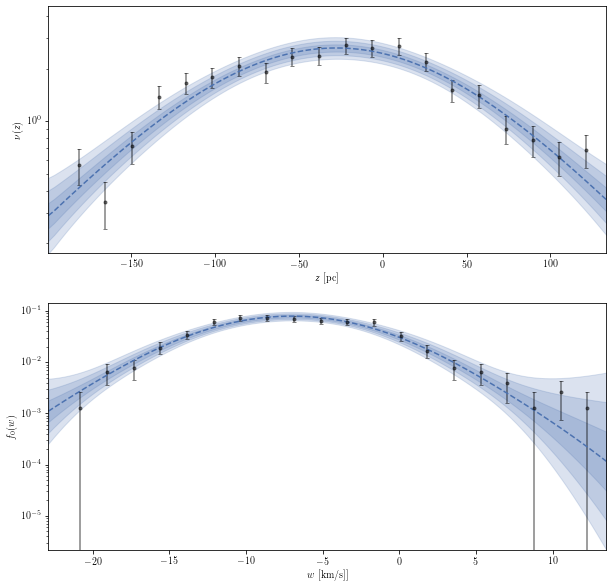

In [38]:
plot_fit(dm, zdata, wdata, chain, ndim)

In [39]:
probs = calculate_probs(dm, chain, ndim, zdata, wdata, locs, scales)

In [ ]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

The script for comparing also implemented in `script` folder.